# Multiple Regression in Python and ScikitLearn

## Objectives

- Explain **linear regression**, and how does it work.
- **Train and interpret** a linear regression model in scikit-learn.
- What are some **evaluation metrics** for regression problems.
- Choose **which features to include** with regression modelling ?

## Introduction 

So far, we have had an introduction to machine learning and seen two main types of ML practices as:

- **Classification:** Predict a categorical response
- **Regression:** Predict a continuous response

We have also seen how regression with ordinary least squares algorithm works in our previous lab. Here , we shall see how to use the most common machine learning library in Python, called `sklearn` ( short for SciKitLearn) to conduct regression analysis using gradient descent instead as an optimization method for drawing the regression line. 

Following are a couple of good resources highlighting the maths behind gradient descent algorithm. 

https://towardsdatascience.com/linear-regression-simplified-ordinary-least-square-vs-gradient-descent-48145de2cf76
https://spin.atomicobject.com/2014/06/24/gradient-descent-linear-regression/

Luckily, `sklearn` comes packaged with gradient descent algorithm so we won't have to program that. 


## Analyzing the dataset

For this lab, we shall use the *Advertising and Sales* dataset from Kaggle. [Here is a link to this dataset and description of variables](https://www.kaggle.com/sazid28/advertising.csv)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
# read CSV file from the 'data' subdirectory using a relative path
data = pd.read_csv('advertising.csv', index_col=0)

# display the first 5 rows
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [2]:
# display the last 5 rows
data.tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [3]:
# check the shape of the DataFrame (rows, columns)
data.shape

(200, 4)

The `.shape()` function resturns the number of rows and columns which would help us get an idea about features, label/response (columns) and number of examples (rows). 

What are the features?
- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

What is the response?
- **Sales:** sales of a single product in a given market (in thousands of items)

What else do we know?
- Because the response variable is continuous, this is a **regression** problem.
- There are 200 **observations** (represented by the rows), and each observation is a single market.

## Visualizing data using seaborn

**Seaborn:** Python library for statistical data visualization built on top of Matplotlib

Seaborn provides an easy way to process and visualize data with simpler code/instructions. Let's first install seaborn into our python environment. We shall use the `sns.pairplot()` function to visualize the correlation of individual features on the response variable. This function will draw a number of scatter plots (depending on the number of features in the dataset) 


In [4]:
# Pip install seaborn if you dont have it already on your machine
!pip install seaborn

In [5]:
# import seaborn
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline

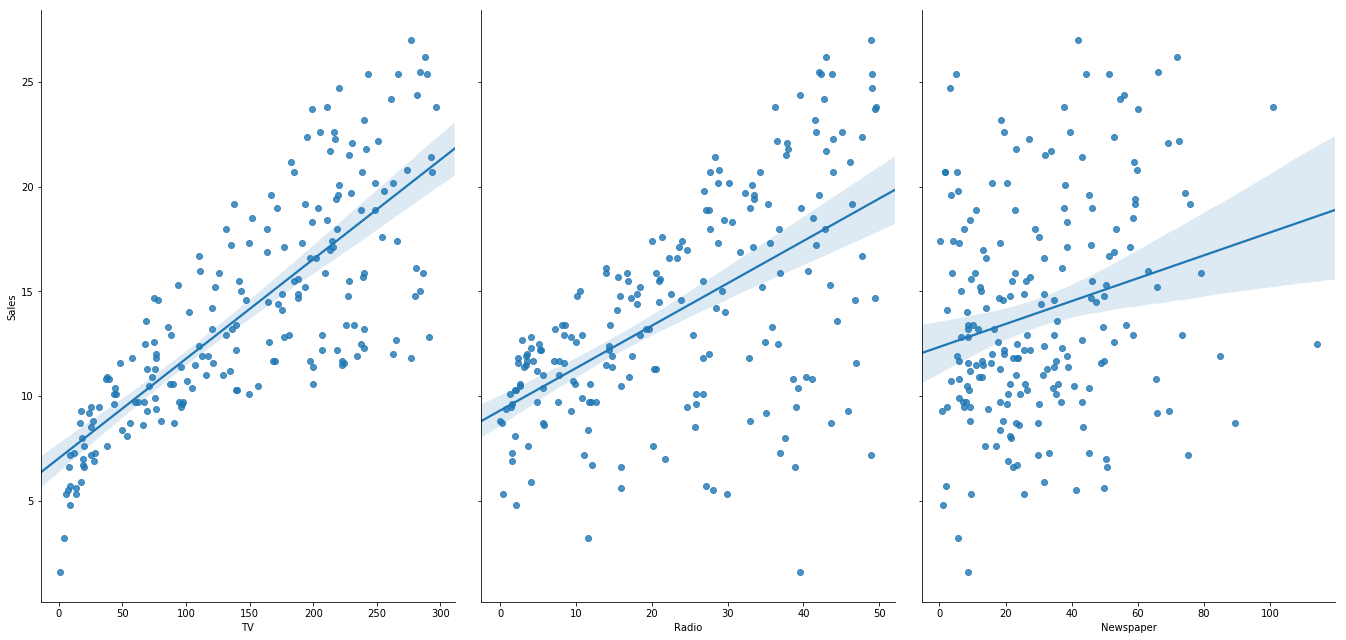

In [6]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=9, aspect=0.7, kind='reg')

By default, this function creates a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column. The diagonal Axes are treated differently, drawing a plot to show the univariate distribution of the data for the variable in that column. 

The shaded region in the plots highlight the confidence interval and it is clear that with newspapers, due to variability in the data, the confidence interval is large i.e. low confidence vs. that in the TV. This tells us that advertising on television is highly correlated with increase in sales. 

## Linear regression

Linear regression is fast and doesn't require much tuning. The results are highly interpretable and are usually  well-understood by non-technical individuals. 

Linear regression, however, is unlikely to produce the best predictive accuracy (presumes a linear relationship between the features and response). We shall look into these aspects in more detail as we progress. 

### Form of linear regression

We have seen linear regression so far as **y = mx+c** while working with slope and intercept. For multiple variables, as in this example, the equation becomes:

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

- $y$ is the response
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for $x_1$ (the first feature)
- $\beta_n$ is the coefficient for $x_n$ (the nth feature)

In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

The $\beta$ values are called the **model coefficients**. These values are "learned" during the model fitting step using the "least squares" criterion. Then, the fitted model can be used to make predictions!

## Preparing X and y

Scikit-learn expects X (feature matrix) and y (response vector) to be NumPy arrays. However, pandas is built on top of NumPy. Thus, X can be a pandas DataFrame and y can be a pandas Series. 


In [7]:
# create a Python list of feature names
feature_cols = ['TV', 'Radio', 'Newspaper']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# Create X with input features from the dataset
X = data[['TV', 'Radio', 'Newspaper']]

# print the first 5 rows
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [8]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


So now we have our X as a pandas dataframe, having 300 examples , each with 3 features. This is great. Now we can go ahead and extract the y. 

In [9]:
# select a Series from the DataFrame
y = data['Sales']

# print the first 5 values
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [10]:
# check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


A single columns considers a single variable object as a pandas series object, again, having 300 responses to our X features. 

## Splitting X and y into training and testing sets

Following the supervised learning approach, we need to split the data into Training and Testing datasets. `sklearn` provides as easy method to perform this split, called `train_test_split`. Let's use this function with default settings to do a 75-25 split as shown below:

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [12]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150, 3)
(150,)
(50, 3)
(50,)


We can specify a different split (like 80-20 or even 90-10), based on the amount of data avaiable. Details of this method can be seen [HERE](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). 

Having split our data, we can now run the regression tests on the training data. 

## Linear regression in scikit-learn

In [13]:
# import model
from sklearn.linear_model import LinearRegression 

# Create an instance of linear regression 
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Interpreting model coefficients

In [14]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

2.8769666223179318
[0.04656457 0.17915812 0.00345046]


Let's try to print these nicely so the output makes more sense.

In [15]:
# create a Python list of feature names
feature_cols = ['TV', 'Radio', 'Newspaper']

# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

[('TV', 0.04656456787415028),
 ('Radio', 0.17915812245088836),
 ('Newspaper', 0.0034504647111804347)]

$$y = 2.88 + 0.0466 \times TV + 0.179 \times Radio + 0.00345 \times Newspaper$$

How do we interpret the **TV coefficient** (0.0466)?

- For a given amount of Radio and Newspaper ad spending, **a "unit" increase in TV ad spending** is associated with a **0.0466 "unit" increase in Sales**.
- Or more clearly: For a given amount of Radio and Newspaper ad spending, **an additional $1,000 spent on TV ads** is associated with an **increase in sales of 46.6 items**.

Important notes:

- This is a statement of **association**, not **causation**.
- If an increase in TV ad spending was associated with a **decrease** in sales, $\beta_1$ would be **negative**.

### Testing the Model 

Let's now show our x_test to the model and ask it to predict y_test to check the predictive accuracy of our model.

In [16]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)
y_pred[0:10]

array([21.70910292, 16.41055243,  7.60955058, 17.80769552, 18.6146359 ,
       23.83573998, 16.32488681, 13.43225536,  9.17173403, 17.333853  ])

We need an **evaluation metric** in order to compare our predictions with the actual values!

## Model evaluation metrics for regression

Evaluation metrics for classification problems, such as **accuracy**, are not useful for regression problems. Instead, we need evaluation metrics designed for comparing continuous values.

Let's create some example numeric predictions, and calculate **three common evaluation metrics** for regression problems:

In [17]:
# define true and predicted response values - This is an example
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

In [18]:
# calculate MAE by hand
print((10 + 0 + 20 + 10)/4.)

# calculate MAE using scikit-learn
from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))

10.0
10.0


**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

In [19]:
# calculate MSE by hand
print((10**2 + 0**2 + 20**2 + 10**2)/4.)

# calculate MSE using scikit-learn
print(metrics.mean_squared_error(true, pred))

150.0
150.0


**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [20]:
# calculate RMSE by hand
import numpy as np
print(np.sqrt((10**2 + 0**2 + 20**2 + 10**2)/4.))

# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(true, pred)))

12.24744871391589
12.24744871391589


Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

### Computing the RMSE for our Sales predictions

In [21]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.4046514230328955


## Feature selection

Does **Newspaper** "belong" in our model? In other words, does it improve the quality of our predictions?

Let's **remove it** from the model and check the RMSE!

In [22]:
# create a Python list of feature names
feature_cols = ['TV', 'Radio']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# select a Series from the DataFrame
y = data.Sales

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.3879034699382888


The RMSE **decreased** when we removed Newspaper from the model. (Error is something we want to minimize, so **a lower number for RMSE is better**.) Thus, it is unlikely that this feature is useful for predicting Sales, and should be removed from the model.

### Calculate variance in the results

R2 (r-squared), that we earlier identified as a measure of variance in our model can provide us with some insight into the confidence that we can give to our model. 

In [23]:
# Explained variance score: 1 is perfect prediction
from sklearn.metrics import r2_score
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Variance score: 0.92


This tells us that the R2 value (range: -1 to 1), which 0.92 in this case is a strong indicator that model is explained with a low variance is data and the results carry a high confidence.

### Another Example with Visualisation

Below is another example of multiple regression performed with statsmodels, another library which can be used for statistical computations. 

<IPython.core.display.Javascript object>


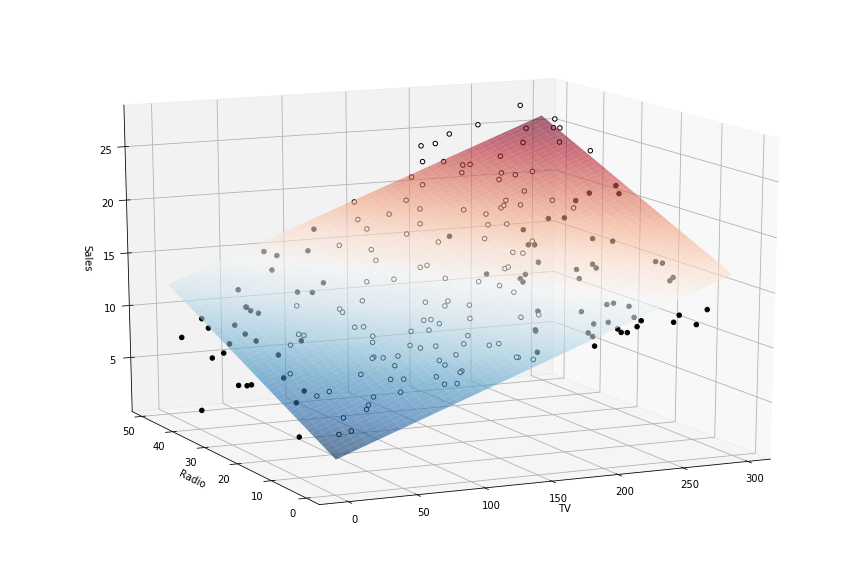

Text(0.5,0,'Sales')

In [29]:

from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm

%matplotlib notebook 

df_adv = data
X = df_adv[['TV', 'Radio']]
y = df_adv['Sales']

## fit a OLS model with intercept on TV and Radio
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()

## Create the 3d plot -- skip reading this
# TV/Radio grid for 3d plot
xx1, xx2 = np.meshgrid(np.linspace(X.TV.min(), X.TV.max(), 100), 
                       np.linspace(X.Radio.min(), X.Radio.max(), 100))

# plot the hyperplane by evaluating the parameters on the grid
Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

# create matplotlib 3d axes
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)

# plot hyperplane
surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

# plot data points - points over the HP are white, points below are black
resid = y - est.predict(X)
ax.scatter(X[resid >= 0].TV, X[resid >= 0].Radio, y[resid >= 0], color='black', alpha=1.0, facecolor='white')
ax.scatter(X[resid < 0].TV, X[resid < 0].Radio, y[resid < 0], color='black', alpha=1.0)

# set axis labels
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')

### Exercises:

* Try different combinations of preditors from the above example and see the impact on RMSE. 

* Perform similar regression experiment with Boston house pricing dataset available in the scikit Learn library datasets. Use following code snippet to load the data.
```
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)
>>>(506, 13)
```


## Resources

Linear regression:

- Chapter 3 of [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/) and [related videos](http://www.dataschool.io/15-hours-of-expert-machine-learning-videos/) by Hastie and Tibshirani (Stanford)
- [Quick reference guide to applying and interpreting linear regression](http://www.dataschool.io/applying-and-interpreting-linear-regression/)
- [Introduction to linear regression](http://people.duke.edu/~rnau/regintro.htm) by Robert Nau 

